<a href="https://colab.research.google.com/github/Uchimakali33/Maatram_project/blob/main/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
from google.colab import files
uploaded=files.upload()

Saving maatram_realistic.csv to maatram_realistic (2).csv


In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("maatram_realistic.csv")
df

,Family_Income_Monthly,Current_CGPA,Student_Motivation,Physical_Verification_Score,Siblings_Count,Parents_Employed,School_Type_Public,Gender,Dropout_Likelihood
0,20795,6.13,6,3,1,0,0,Male,0
1,5860,8.70,8,6,0,1,1,Male,0
2,16284,7.33,4,9,4,0,1,Female,0
3,11265,4.03,7,2,2,0,1,Female,1
4,21850,8.57,6,1,4,0,1,Male,0
...,...,...,...,...,...,...,...,...,...
1995,39196,6.57,3,2,4,0,0,Male,0
1996,19566,8.39,8,1,4,1,0,Male,0
1997,19042,8.95,4,3,1,0,1,Male,0
1998,30498,4.88,8,7,2,1,1,Female,0


In [231]:
target=df['Dropout_Likelihood']
features=df.drop(columns=["Dropout_Likelihood","Student_Motivation","Gender"])
features

,Family_Income_Monthly,Current_CGPA,Physical_Verification_Score,Siblings_Count,Parents_Employed,School_Type_Public
0,20795,6.13,3,1,0,0
1,5860,8.70,6,0,1,1
2,16284,7.33,9,4,0,1
3,11265,4.03,2,2,0,1
4,21850,8.57,1,4,0,1
...,...,...,...,...,...,...
1995,39196,6.57,2,4,0,0
1996,19566,8.39,1,4,1,0
1997,19042,8.95,3,1,0,1
1998,30498,4.88,7,2,1,1


In [232]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2, random_state=42)



In [244]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model3=RandomForestClassifier(n_estimators=10,max_depth=6,random_state=42)
model3.fit(x_train,y_train)
pred3=model3.predict(x_test)
pred3
score=accuracy_score(y_test,pred3)
score

0.87

<Axes: >

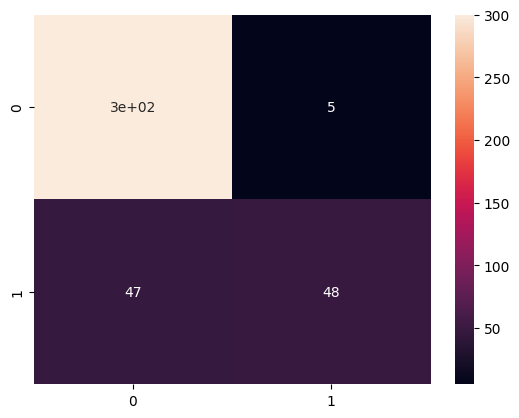

In [245]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm=confusion_matrix(y_test,pred3)
sn.heatmap(cm,annot=True)


In [246]:
import joblib

joblib.dump(model3,"model3.pkl")


['model3.pkl']